# Recommender Systems

## Problem Statement:

- This notebook implements a movie recommender system. 
- Recommender systems are used to suggest movies or songs to users based on their interest or usage history. 
- For example, Netflix recommends movies to watch based on the previous movies you've watched.  
- In this example, we will use __Collaborative Filtering__ 

![image](https://i.kinja-img.com/gawker-media/image/upload/s--e3_2HgIC--/c_scale,f_auto,fl_progressive,q_80,w_800/1259003599478673704.jpg)

## Collaborative Filtering: 
This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.

Our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is.

### Item Based Collaborative Filtering:
Item-based Collaborative Filtering is a form of collaborative filtering for recommender systems based on the similarity between items calculated using people's ratings of those items.

- Based on User 1 and 2, they both watched and liked Titanic and a walk to remember.
- Item-based collaborative filtering will correlate both movies together based on user 1 and 2 behaviour. 
- User 3 watched “Titanic” and did not watch a “Walk to remember”, so the recommender system will recommend it for him/her. 
![image](user-based.png)

## Step 1. Importing Labraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 2. Data Preprocessing

### Importing Two Datasets

In [2]:
# let's load the first one:
movies_title_df = pd.read_csv('dataset/Movie_Id_Titles')

# Let's load the second one:
movies_rating_df = pd.read_csv('dataset/u.data', sep='\t', names = ['user_id','item_id','rating','timestamp'])

In [3]:
movies_title_df.head(10)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [4]:
movies_rating_df.head(10)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
5,22,377,1,878887116
6,244,51,2,880606923
7,166,346,1,886397596
8,298,474,4,884182806
9,115,265,2,881171488


In [5]:
# Let's drop the timestamp 
movies_rating_df = movies_rating_df.drop('timestamp', axis=1)

In [6]:
print('Dimensions:',movies_rating_df.shape)
movies_rating_df.head(10)

Dimensions: (100003, 3)


,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3
5,22,377,1
6,244,51,2
7,166,346,1
8,298,474,4
9,115,265,2


In [7]:
movies_rating_df[['rating']].describe()

,rating
count,100003.000000
mean,3.529864
std,1.125704
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


In [8]:
# Let's find out if dataset have null values
movies_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
user_id    100003 non-null int64
item_id    100003 non-null int64
rating     100003 non-null int64
dtypes: int64(3)
memory usage: 2.3 MB


In [9]:
# Merging both datasets on 'item_id'
movies_rating_df = movies_rating_df.merge(movies_title_df, on = 'item_id')

In [10]:
movies_rating_df.head(10)

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)
5,274,50,5,Star Wars (1977)
6,227,50,4,Star Wars (1977)
7,99,50,5,Star Wars (1977)
8,305,50,5,Star Wars (1977)
9,108,50,4,Star Wars (1977)


In [11]:
movies_rating_df.shape

(100003, 4)

## Step 3. Visualizing Dataset

In [12]:
movies_rating_df.head(10)

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)
5,274,50,5,Star Wars (1977)
6,227,50,4,Star Wars (1977)
7,99,50,5,Star Wars (1977)
8,305,50,5,Star Wars (1977)
9,108,50,4,Star Wars (1977)


In [13]:
# groupby function on 'title'
# then getting information using describe()
movies_rating_df.groupby('title').describe().head(10)

user_id                          \
                                              count        mean         std   
title                                                                         
'Til There Was You (1997)                       9.0  383.777778  204.272354   
1-900 (1994)                                    5.0  477.000000  244.344020   
101 Dalmatians (1996)                         109.0  450.330275  295.142779   
12 Angry Men (1957)                           125.0  453.552000  255.588677   
187 (1997)                                     41.0  517.097561  241.098300   
2 Days in the Valley (1996)                    93.0  473.559140  256.437909   
20,000 Leagues Under the Sea (1954)            72.0  476.125000  276.546914   
2001: A Space Odyssey (1968)                  259.0  460.965251  273.527989   
3 Ninjas: High Noon At Mega Mountain (1998)     5.0  273.400000  286.409322   
39 Steps, The (1935)                           59.0  494.864407  277.847295   

                                                                           \
                                               min     25%    50%     75%   
title                                                                       
'Til There Was You (1997)                    152.0  223.00  342.0  530.00   
1-900 (1994)                                 181.0  385.00  405.0  581.00   
101 Dalmatians (1996)                          1.0  183.00  435.0  699.00   
12 Angry Men (1957)                            1.0  268.00  429.0  661.00   
187 (1997)                                     3.0  416.00  532.0  698.00   
2 Days in the Valley (1996)                   26.0  277.00  449.0  666.00   
20,000 Leagues Under the Sea (1954)            1.0  270.25  461.0  750.75   
2001: A Space Odyssey (1968)                   1.0  235.50  452.0  693.50   
3 Ninjas: High Noon At Mega Mountain (1998)    2.0   13.00  206.0  537.00   
39 Steps, The (1935)                           7.0  310.00  524.0  731.50   

                                                   item_id          ...  \
                                               max   count    mean  ...   
title                                                               ...   
'Til There Was You (1997)                    782.0     9.0  1300.0  ...   
1-900 (1994)                                 833.0     5.0  1353.0  ...   
101 Dalmatians (1996)                        938.0   109.0   225.0  ...   
12 Angry Men (1957)                          932.0   125.0   178.0  ...   
187 (1997)                                   894.0    41.0   330.0  ...   
2 Days in the Valley (1996)                  943.0    93.0  1011.0  ...   
20,000 Leagues Under the Sea (1954)          932.0    72.0   141.0  ...   
2001: A Space Odyssey (1968)                 942.0   259.0   135.0  ...   
3 Ninjas: High Noon At Mega Mountain (1998)  609.0     5.0   314.0  ...   
39 Steps, The (1935)                         942.0    59.0   615.0  ...   

                                                            rating            \
                                                75%     max  count      mean   
title                                                                          
'Til There Was You (1997)                    1300.0  1300.0    9.0  2.333333   
1-900 (1994)                                 1353.0  1353.0    5.0  2.600000   
101 Dalmatians (1996)                         225.0   225.0  109.0  2.908257   
12 Angry Men (1957)                           178.0   178.0  125.0  4.344000   
187 (1997)                                    330.0   330.0   41.0  3.024390   
2 Days in the Valley (1996)                  1011.0  1011.0   93.0  3.225806   
20,000 Leagues Under the Sea (1954)           141.0   141.0   72.0  3.500000   
2001: A Space Odyssey (1968)                  135.0   135.0  259.0  3.969112   
3 Ninjas: High Noon At Mega Mountain (1998)   314.0   314.0    5.0  1.000000   
39 Steps, The (1935)                          615.0   615.0   59.0  4.050847  

In [14]:
# groupby function on 'title'
# then getting information using describe() from 'rating' column
movies_rating_df.groupby('title')['rating'].describe().head(10)

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.0,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.0,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.0,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.0,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.0,3.0,4.0,5.0
2 Days in the Valley (1996),93.0,3.225806,0.957000,1.0,3.0,3.0,4.0,5.0
"20,000 Leagues Under the Sea (1954)",72.0,3.500000,0.731581,2.0,3.0,4.0,4.0,5.0
2001: A Space Odyssey (1968),259.0,3.969112,1.026307,1.0,3.0,4.0,5.0,5.0
3 Ninjas: High Noon At Mega Mountain (1998),5.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [15]:
# Mean ratings of the dataframe
ratings_mean_df = movies_rating_df.groupby('title')['rating'].describe()['mean']
ratings_mean_df.head(10)

title
'Til There Was You (1997)                      2.333333
1-900 (1994)                                   2.600000
101 Dalmatians (1996)                          2.908257
12 Angry Men (1957)                            4.344000
187 (1997)                                     3.024390
2 Days in the Valley (1996)                    3.225806
20,000 Leagues Under the Sea (1954)            3.500000
2001: A Space Odyssey (1968)                   3.969112
3 Ninjas: High Noon At Mega Mountain (1998)    1.000000
39 Steps, The (1935)                           4.050847
Name: mean, dtype: float64

In [16]:
# Count of Ratings in the dataframe
ratings_count_df = movies_rating_df.groupby('title')['rating'].describe()['count']
ratings_count_df.head(10)

title
'Til There Was You (1997)                        9.0
1-900 (1994)                                     5.0
101 Dalmatians (1996)                          109.0
12 Angry Men (1957)                            125.0
187 (1997)                                      41.0
2 Days in the Valley (1996)                     93.0
20,000 Leagues Under the Sea (1954)             72.0
2001: A Space Odyssey (1968)                   259.0
3 Ninjas: High Noon At Mega Mountain (1998)      5.0
39 Steps, The (1935)                            59.0
Name: count, dtype: float64

In [17]:
# concatinating the two dataframes
ratings_mean_count_df = pd.concat([ratings_count_df,ratings_mean_df], axis=1)

# Resetting the index of the dataframe
ratings_mean_count_df.reset_index(inplace=True)

In [18]:
ratings_mean_count_df.head(10)

,title,count,mean
0,'Til There Was You (1997),9.0,2.333333
1,1-900 (1994),5.0,2.600000
2,101 Dalmatians (1996),109.0,2.908257
3,12 Angry Men (1957),125.0,4.344000
4,187 (1997),41.0,3.024390
5,2 Days in the Valley (1996),93.0,3.225806
6,"20,000 Leagues Under the Sea (1954)",72.0,3.500000
7,2001: A Space Odyssey (1968),259.0,3.969112
8,3 Ninjas: High Noon At Mega Mountain (1998),5.0,1.000000
9,"39 Steps, The (1935)",59.0,4.050847


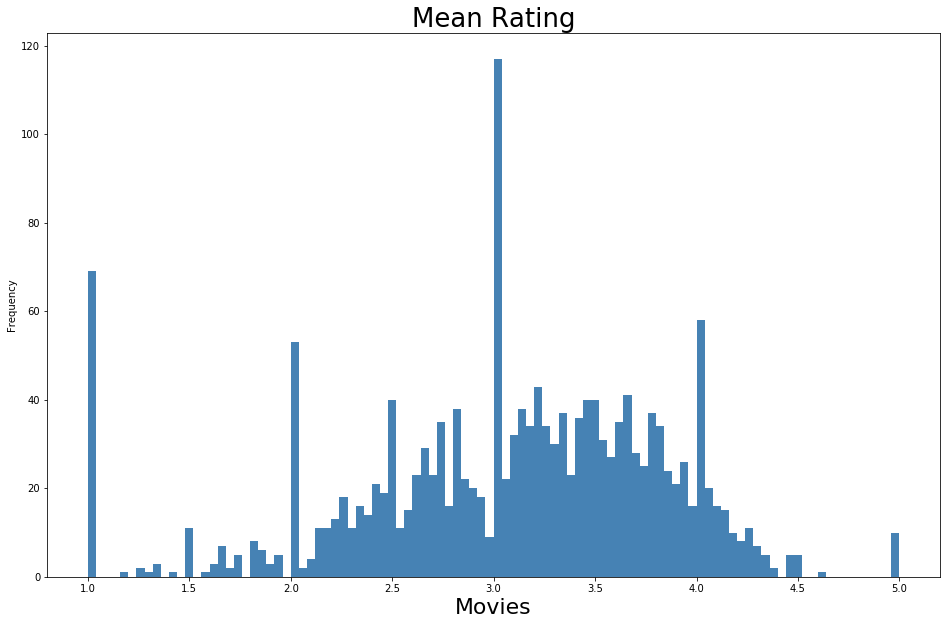

In [19]:
plt.rcParams.update({'font.size': 10})
ratings_mean_count_df['mean'].plot(kind = 'hist',
                                bins=100,
                                color='steelblue',
                                figsize=(16,10)
                                  )
plt.title("Mean Rating", fontsize=26)
plt.xlabel("Movies", fontsize=22)
plt.show()

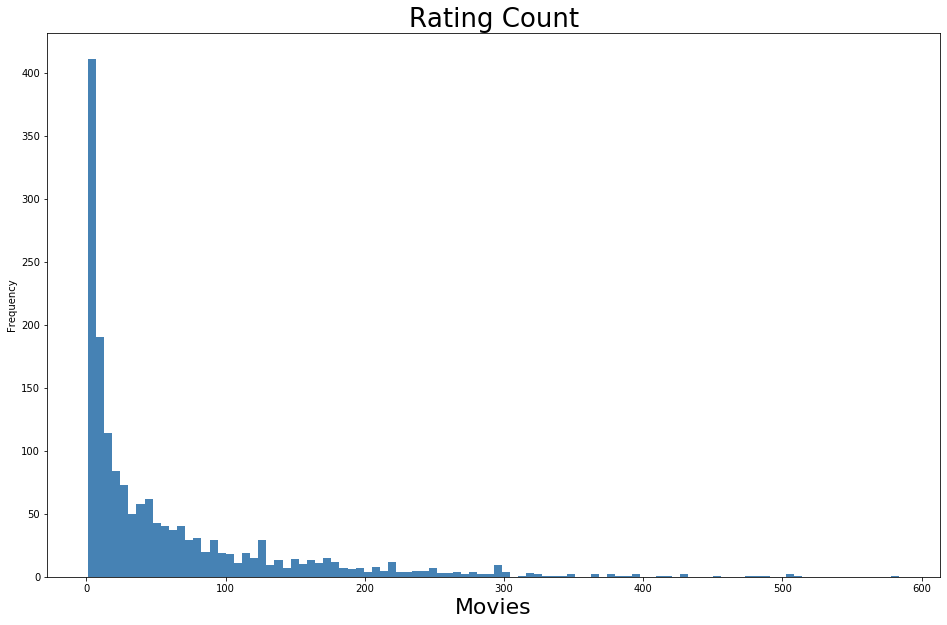

In [20]:
plt.rcParams.update({'font.size': 10})
ratings_mean_count_df['count'].plot(kind = 'hist',
                                bins=100,
                                color='steelblue',
                                figsize=(16,10)
                                  )
plt.title("Rating Count", fontsize=26)
plt.xlabel("Movies", fontsize=22)
plt.show()

In [21]:
# Movies with 5 rating in dataframe
ratings_mean_count_df[ratings_mean_count_df['mean'] == 5]

,title,count,mean
30,Aiqing wansui (1994),1.0,5.0
462,Entertaining Angels: The Dorothy Day Story (1996),1.0,5.0
633,"Great Day in Harlem, A (1994)",1.0,5.0
944,Marlene Dietrich: Shadow and Light (1996),1.0,5.0
1172,Prefontaine (1997),3.0,5.0
1273,"Saint of Fort Washington, The (1993)",2.0,5.0
1277,Santa with Muscles (1996),2.0,5.0
1359,Someone Else's America (1995),1.0,5.0
1387,Star Kid (1997),3.0,5.0
1472,They Made Me a Criminal (1939),1.0,5.0


In [22]:
# Most rated movies
ratings_mean_count_df.sort_values(by='count', ascending=False).head(20)

,title,count,mean
1398,Star Wars (1977),584.0,4.359589
333,Contact (1997),509.0,3.803536
498,Fargo (1996),508.0,4.155512
1234,Return of the Jedi (1983),507.0,4.007890
860,Liar Liar (1997),485.0,3.156701
460,"English Patient, The (1996)",481.0,3.656965
1284,Scream (1996),478.0,3.441423
1523,Toy Story (1995),452.0,3.878319
32,Air Force One (1997),431.0,3.631090
744,Independence Day (ID4) (1996),429.0,3.438228


In [23]:
# Least rated movies
ratings_mean_count_df.sort_values(by='count').head(20)

,title,count,mean
1663,Á köldum klaka (Cold Fever) (1994),1.0,3.0
980,Mille bolle blu (1993),1.0,1.0
951,Mat' i syn (1997),1.0,1.0
944,Marlene Dietrich: Shadow and Light (1996),1.0,5.0
931,"Man from Down Under, The (1943)",1.0,1.0
927,Mamma Roma (1962),1.0,4.0
915,Mad Dog Time (1996),1.0,3.0
166,"Big Bang Theory, The (1994)",1.0,4.0
911,MURDER and murder (1996),1.0,2.0
322,Coldblooded (1995),1.0,2.0


## Step 4. Performing Item-Based Collaborative Filtering On One Movie Sample

In [24]:
# Creating pivot table with index as 'user_id', columns as 'title'
# and values as 'rating'
userid_movietitle_matrix = movies_rating_df.pivot_table(index='user_id',columns='title',values='rating')

In [25]:
userid_movietitle_matrix.head(10)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# getting titanic from pivot table
titanic = userid_movietitle_matrix['Titanic (1997)']
titanic.head(10)

user_id
0    NaN
1    NaN
2    5.0
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: Titanic (1997), dtype: float64

In [27]:
# getting star wars from pivot table
starwars = userid_movietitle_matrix['Star Wars (1977)']
starwars.head(10)

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
6    4.0
7    5.0
8    5.0
9    5.0
Name: Star Wars (1977), dtype: float64

### 1 - Recommendations after Watching Titanic (1997)

In [28]:
# Calculating correlation of titanic with all other movies
titanic_correlations = pd.DataFrame(userid_movietitle_matrix.corrwith(titanic), columns=['Correlation'])

C:\Users\brigu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\brigu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [29]:
# joining 'count' from ratings_mean_count_df with 'titanic_correlations'
titanic_correlations = titanic_correlations.join(ratings_count_df)
titanic_correlations.head(10)

,Correlation,count
title,,
'Til There Was You (1997),-0.062017,9.0
1-900 (1994),NaN,5.0
101 Dalmatians (1996),0.120113,109.0
12 Angry Men (1957),0.077700,125.0
187 (1997),0.315654,41.0
2 Days in the Valley (1996),0.017295,93.0
"20,000 Leagues Under the Sea (1954)",0.246718,72.0
2001: A Space Odyssey (1968),-0.042024,259.0
3 Ninjas: High Noon At Mega Mountain (1998),NaN,5.0


In [30]:
# dropping nan values
titanic_correlations.dropna(inplace=True)
titanic_correlations.head(10)

,Correlation,count
title,,
'Til There Was You (1997),-0.062017,9.0
101 Dalmatians (1996),0.120113,109.0
12 Angry Men (1957),0.077700,125.0
187 (1997),0.315654,41.0
2 Days in the Valley (1996),0.017295,93.0
"20,000 Leagues Under the Sea (1954)",0.246718,72.0
2001: A Space Odyssey (1968),-0.042024,259.0
"39 Steps, The (1935)",0.155752,59.0
8 1/2 (1963),-0.039301,38.0


In [31]:
# Sorting titanic_correlation by 'Correlation'
titanic_correlations.sort_values(by='Correlation',ascending=False).head(10)

,Correlation,count
title,,
Nadja (1994),1.0,8.0
"Pest, The (1997)",1.0,8.0
"Savage Nights (Nuits fauves, Les) (1992)",1.0,3.0
For Ever Mozart (1996),1.0,3.0
"Jerky Boys, The (1994)",1.0,3.0
"Newton Boys, The (1998)",1.0,4.0
Hearts and Minds (1996),1.0,5.0
"Simple Wish, A (1997)",1.0,3.0
Purple Noon (1960),1.0,7.0


In [32]:
# getting movies correlated to titanic which have ratings count > 80
titanic_correlations[titanic_correlations['count'] > 80].sort_values(by='Correlation',ascending=False).head(10)

,Correlation,count
title,,
Titanic (1997),1.000000,350.0
"River Wild, The (1994)",0.497600,146.0
"Abyss, The (1989)",0.472103,151.0
Bram Stoker's Dracula (1992),0.443560,120.0
True Lies (1994),0.435104,208.0
William Shakespeare's Romeo and Juliet (1996),0.430243,106.0
"Last of the Mohicans, The (1992)",0.427239,128.0
Outbreak (1995),0.426237,104.0
Demolition Man (1993),0.411489,92.0


In [33]:
# Movies Recommendation after Watching Titanic
titanic_recommendations = titanic_correlations[titanic_correlations['count'] > 80].sort_values(by='Correlation',ascending=False).head(11)
titanic_recommendations.drop('Titanic (1997)', axis = 0,inplace = True)

### Top 10 Recommendation after Watching Titanic

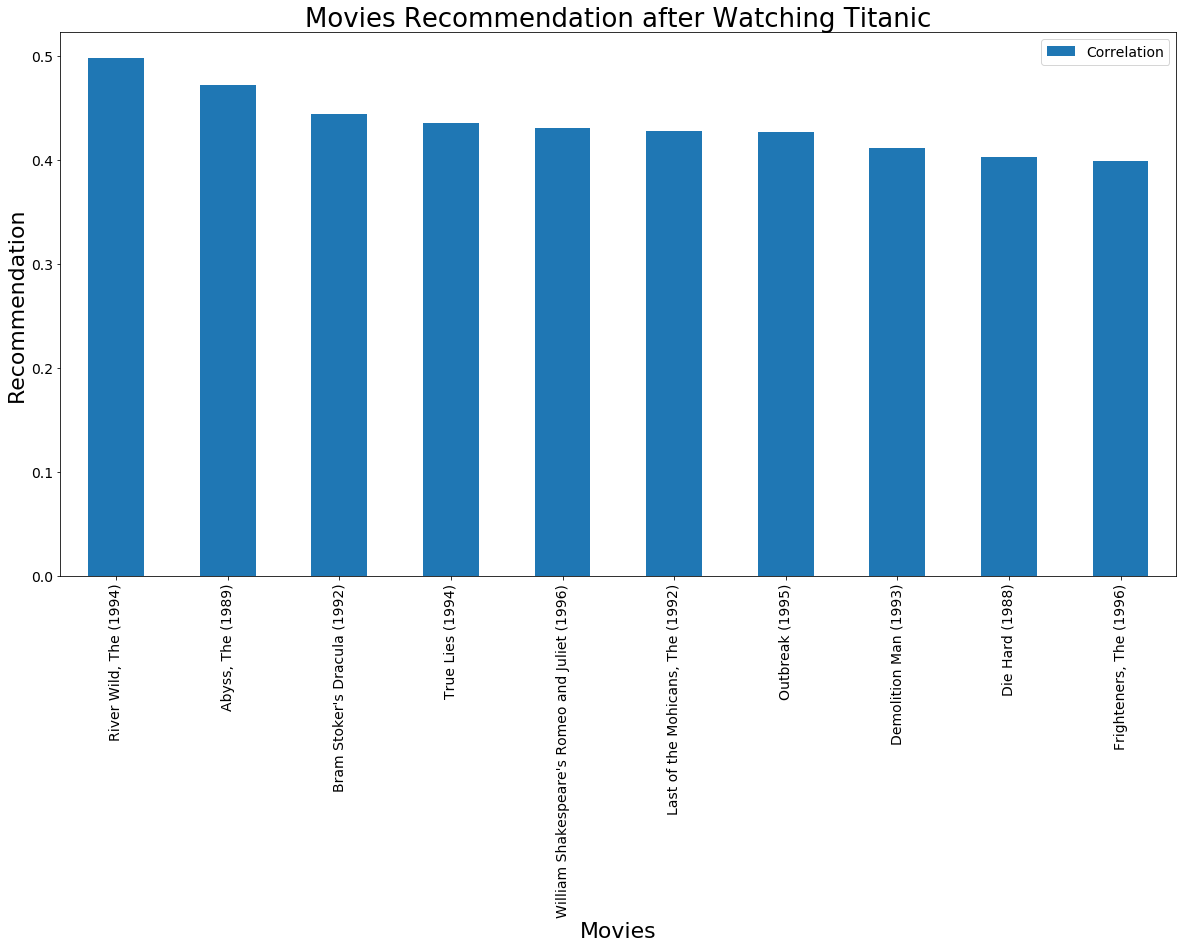

In [34]:
plt.rcParams.update({'font.size': 14})

titanic_recommendations.plot(kind = 'bar',
                             y = 'Correlation',
                            figsize = (20,10)
                            )

plt.xlabel("Movies", fontsize=22)
plt.ylabel('Recommendation', fontsize=22)
plt.title("Movies Recommendation after Watching Titanic", fontsize=26)
plt.show()

### 2 - Recommendations after Watching Star Wars (1977)

In [35]:
# Calculating correlation of star wars with all other movies
starwars_correlations = pd.DataFrame(userid_movietitle_matrix.corrwith(starwars), columns=['Correlation'])

# joining 'count' from ratings_mean_count_df with 'starwars_correlations'
starwars_correlations = starwars_correlations.join(ratings_count_df)
starwars_correlations.head(10)

C:\Users\brigu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\brigu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,count
title,,
'Til There Was You (1997),0.872872,9.0
1-900 (1994),-0.645497,5.0
101 Dalmatians (1996),0.211132,109.0
12 Angry Men (1957),0.184289,125.0
187 (1997),0.027398,41.0
2 Days in the Valley (1996),0.066654,93.0
"20,000 Leagues Under the Sea (1954)",0.289768,72.0
2001: A Space Odyssey (1968),0.230884,259.0
3 Ninjas: High Noon At Mega Mountain (1998),NaN,5.0


In [36]:
starwars_correlations.dropna(inplace=True)
starwars_correlations.head(10)

,Correlation,count
title,,
'Til There Was You (1997),0.872872,9.0
1-900 (1994),-0.645497,5.0
101 Dalmatians (1996),0.211132,109.0
12 Angry Men (1957),0.184289,125.0
187 (1997),0.027398,41.0
2 Days in the Valley (1996),0.066654,93.0
"20,000 Leagues Under the Sea (1954)",0.289768,72.0
2001: A Space Odyssey (1968),0.230884,259.0
"39 Steps, The (1935)",0.106453,59.0


In [37]:
# Sorting starwars_correlation by 'Correlation'
starwars_correlations.sort_values('Correlation', ascending=False).head(10)

,Correlation,count
title,,
Commandments (1997),1.0,3.0
Cosi (1996),1.0,4.0
No Escape (1994),1.0,5.0
Stripes (1981),1.0,5.0
Man of the Year (1995),1.0,9.0
Hollow Reed (1996),1.0,6.0
"Beans of Egypt, Maine, The (1994)",1.0,2.0
"Good Man in Africa, A (1994)",1.0,2.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0,5.0


In [38]:
# getting movies correlated to starwars which have ratings count > 80
starwars_correlations[starwars_correlations['count'] > 80].sort_values('Correlation', ascending=False).head(10)

,Correlation,count
title,,
Star Wars (1977),1.000000,584.0
"Empire Strikes Back, The (1980)",0.748353,368.0
Return of the Jedi (1983),0.672556,507.0
Raiders of the Lost Ark (1981),0.536117,420.0
Austin Powers: International Man of Mystery (1997),0.377433,130.0
"Sting, The (1973)",0.367538,241.0
Indiana Jones and the Last Crusade (1989),0.350107,331.0
Pinocchio (1940),0.347868,101.0
"Frighteners, The (1996)",0.332729,115.0


In [39]:
# Movies Recommendation after Watching Starwars
starwars_recommendations = starwars_correlations[starwars_correlations['count'] > 80].sort_values('Correlation', ascending=False).head(11)
starwars_recommendations.drop('Star Wars (1977)', axis = 0,inplace = True)

### Top 10 Recommendation after Watching Star Wars (1977)

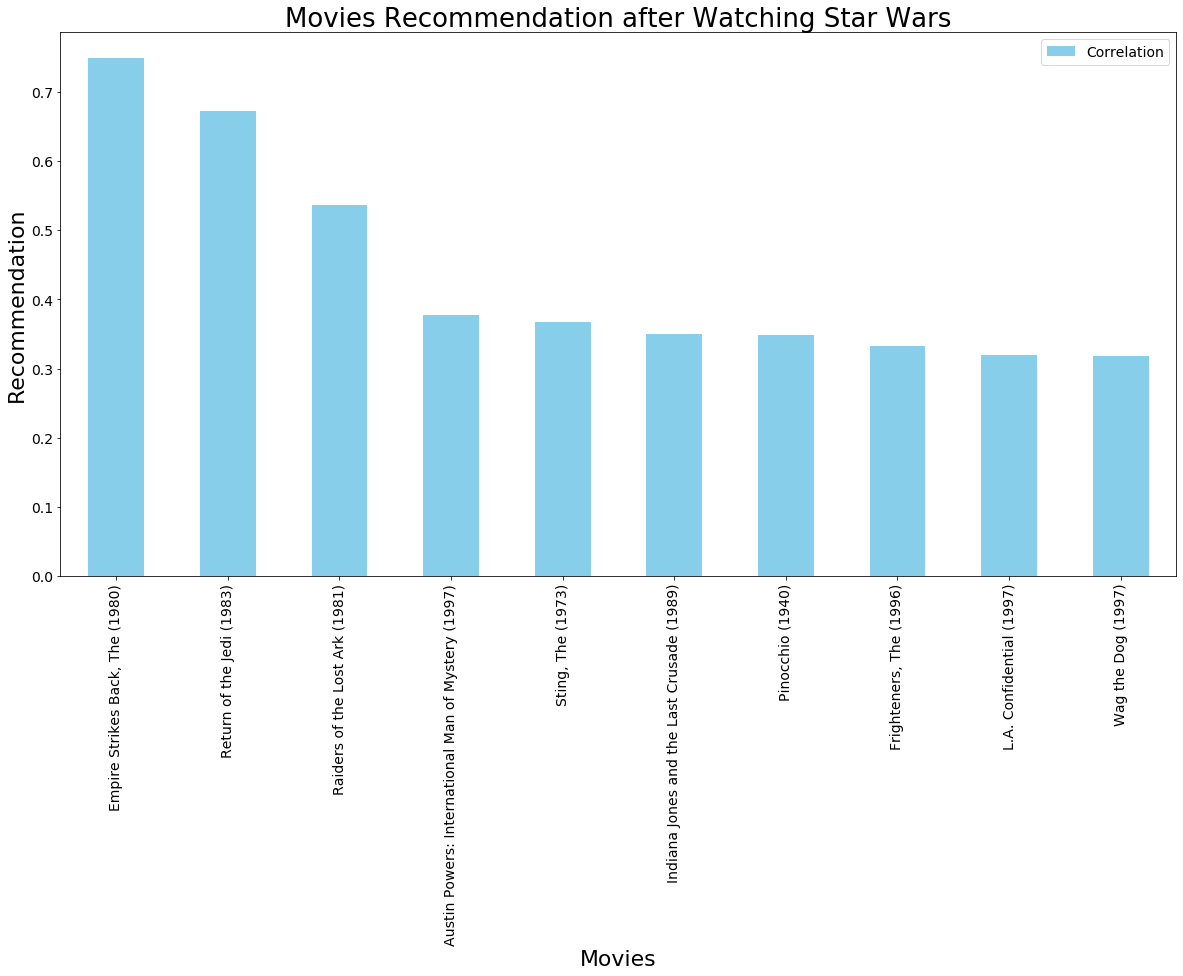

In [40]:
plt.rcParams.update({'font.size':14})

starwars_recommendations.plot(kind = 'bar',
                             y = 'Correlation',
                             figsize=(20,10),
                             color = 'skyblue'
                             )
plt.xlabel("Movies", fontsize=22)
plt.ylabel('Recommendation', fontsize=22)
plt.title("Movies Recommendation after Watching Star Wars", fontsize=26)
plt.show()

## Step 5. Create An Item-Based Collaborative Filtering On The Entire Dataset

In [41]:
userid_movietitle_matrix.head(10)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Calculating movies correlation for the entire matrix
movie_correlations = userid_movietitle_matrix.corr(method='pearson',min_periods=80)

In [43]:
movie_correlations.head(10)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2 Days in the Valley (1996),NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"20,000 Leagues Under the Sea (1954)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001: A Space Odyssey (1968),NaN,NaN,NaN,0.178848,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,-0.001307,NaN,NaN,NaN,NaN,NaN,NaN
3 Ninjas: High Noon At Mega Mountain (1998),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Importing My Random Ratings for The Movies I Have Watched

In [44]:
myRatings = pd.read_csv('dataset/My_Ratings.csv')
myRatings

,Movie Name,Ratings
0,Liar Liar (1997),5
1,Star Wars (1977),1


In [45]:
myRatings['Movie Name'][0]

'Liar Liar (1997)'

__!! You can edit the 'My_Rating' dataset according to you if you want insert new movies with new ratings__

In [46]:
# Creating a pandas series to store similar movies to My_Ratings dataset
movie_recommendations = pd.Series()

for i in range(0,2):
    similar_movie = movie_correlations[myRatings['Movie Name'][i]].dropna()
    similar_movie = similar_movie.map(lambda x: x * myRatings['Ratings'][i])
    movie_recommendations = movie_recommendations.append(similar_movie)

In [47]:
# Sorting movie_recommmendations with respect to ratings
movie_recommendations = movie_recommendations.sort_values( ascending=False).head(11)
movie_recommendations.drop('Liar Liar (1997)',axis=0, inplace = True)
movie_recommendations

Con Air (1997)                               2.349141
Pretty Woman (1990)                          2.348951
Michael (1996)                               2.210110
Indiana Jones and the Last Crusade (1989)    2.072136
Top Gun (1986)                               2.028602
G.I. Jane (1997)                             1.989656
Multiplicity (1996)                          1.984302
Grumpier Old Men (1995)                      1.953494
Ghost and the Darkness, The (1996)           1.895376
Back to the Future (1985)                    1.890139
dtype: float64

### Top 10 Recommendation for Me:

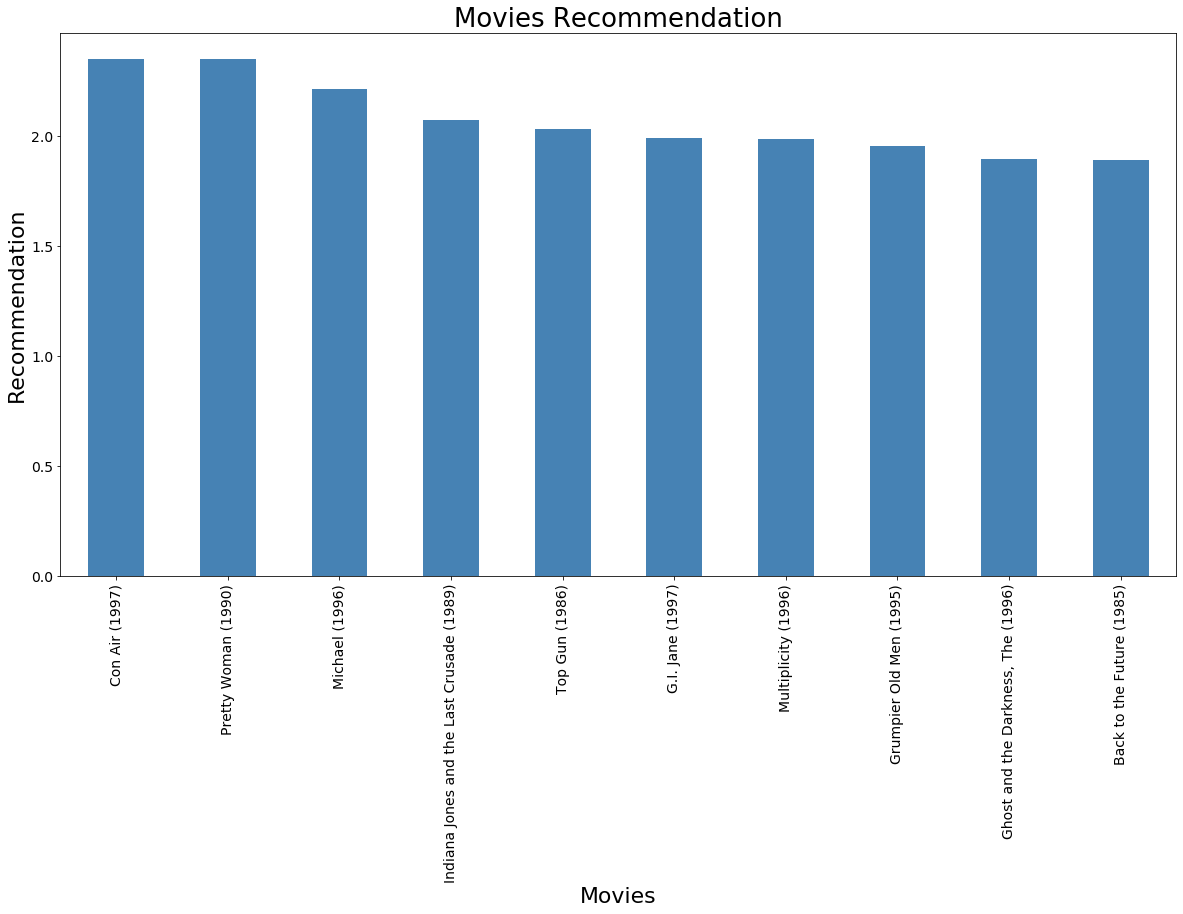

In [48]:
plt.rcParams.update({'font.size':14})

movie_recommendations.plot(kind = 'bar',
                           color = 'steelblue',
                          figsize = (20,10)
                          )
plt.xlabel("Movies", fontsize=22)
plt.ylabel('Recommendation', fontsize=22)
plt.title("Movies Recommendation", fontsize=26)
plt.show()

### Fully developed Movie Recommender System!!!